In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dry_raw = pd.read_csv('../sis_dataset/drychem.csv')

In [5]:
dry_raw[dry_raw.version == 0]

def show_missing_ids(df):
    print(f'missing ids: {set(range(df.id.max())) - set(df.id)}')
    
ver0 = dry_raw[dry_raw.version == 0]
ver1 = dry_raw[dry_raw.version == 1]

for df in [dry_raw, ver0, ver1]:
    show_missing_ids(df)

missing ids: {51, 230}
missing ids: {1538, 516, 2572, 530, 2579, 3093, 2072, 2586, 2075, 2587, 3101, 2598, 552, 1579, 557, 558, 559, 1072, 51, 2101, 2617, 2109, 2634, 2636, 2638, 1107, 596, 92, 1120, 2656, 3172, 3175, 2153, 1139, 2163, 117, 2676, 119, 2182, 1672, 1673, 2194, 2709, 2200, 2715, 2717, 2718, 2719, 1185, 1187, 2724, 2734, 2745, 2238, 2242, 2773, 2262, 2784, 230, 2279, 240, 2821, 2310, 1802, 2827, 2828, 2320, 2836, 2340, 2857, 1840, 2353, 1330, 315, 1339, 1340, 2365, 319, 2368, 2879, 1353, 1355, 345, 350, 1380, 1896, 1897, 2930, 371, 373, 375, 377, 1410, 390, 391, 904, 1422, 1943, 920, 2459, 1948, 1441, 418, 1969, 1458, 1467, 1470, 962, 451, 1990, 974, 982, 3037, 993, 2531, 3050, 3053, 1520, 1521, 1527, 509}
missing ids: {1538, 516, 519, 3082, 3083, 2061, 529, 530, 537, 2073, 2075, 2586, 3114, 1579, 557, 558, 559, 1581, 51, 2101, 2615, 56, 1090, 3141, 1094, 2558, 584, 2630, 3154, 1107, 87, 3165, 2142, 3174, 1139, 1672, 2186, 2189, 2192, 2193, 1171, 1172, 1174, 2727, 2221, 27

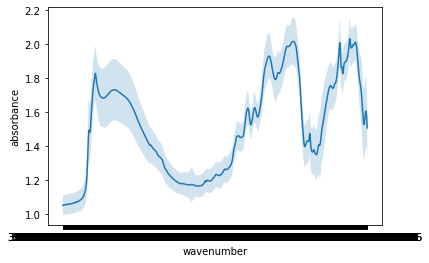

In [15]:
sample = ver0.iloc[373, 2:]


def set_draw_options(fig, ax, spectra=True):
    """
    warning: this operation isn't idempotent
    """
    if spectra:
        ax.set_xlim(ax.get_xlim()[::-1])
        ax.locator_params(nbins=35, axis='x')

    fig.set_size_inches(22, 12, forward=True)


def draw_avg_spec(specs, fig=None, ax=None):
    df = pd.DataFrame({'absorbance': np.median(specs, axis=0), 'wavenumber': specs.columns.values, 'stds': np.std(specs, axis=0)})
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1)
        sns.lineplot(data=df, x='wavenumber', y='absorbance', ax=ax)
        ax.fill_between(df['wavenumber'], df['absorbance'] - df['stds'], df['absorbance'] + df['stds'], alpha=0.2)
        # set_draw_options(fig, ax)
    else:
        sns.lineplot(data=df, x='wavenumber', y='absorbance', ax=ax)
        ax.fill_between(df['wavenumber'], df['absorbance'] - df['stds'], df['absorbance'] + df['stds'], alpha=0.2)





np.median(ver0, axis=0).shape
ver0
draw_avg_spec(ver0.iloc[:, 2:])